Notes:\
River baseflow refers to the sustained, slow-moving component of streamflow in rivers and streams that comes from groundwater discharge into the watercourse. It's the flow that continues even when there's no recent precipitation, snowmelt, or storm runoff.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv('RRCA_baseflow.csv')
df['Date'] = df['Date'] - 693963
df.head()


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689


### Look at sample quantities for each segment

42


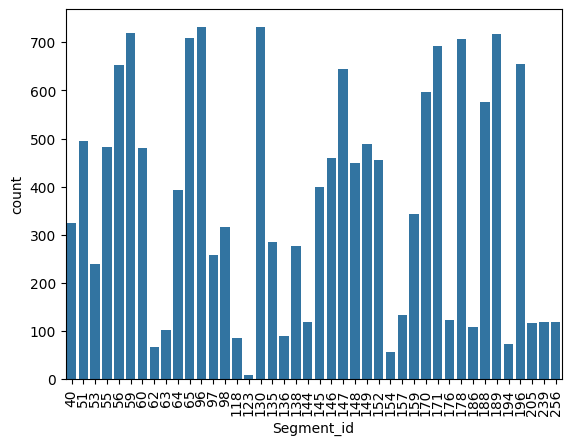

In [2]:
distinct_segment_ids = df['Segment_id'].nunique()
print(distinct_segment_ids)

plt.figure()
sns.countplot(data=df, x='Segment_id')
_,_ = plt.xticks(rotation=90) # remove the xticks from being printed

Consider looking at 59, 65, 96, 171, 178, 189, 196

Date vs Observed


Intercept    12.803269
Date         -0.000228
dtype: float64

,0,1
Intercept,11.097937,14.508601
Date,-0.000292,-0.000163


p-values


Intercept    3.097692e-43
Date         9.146520e-12
dtype: float64

Evapotranspiration vs Observed


Intercept             7.87593
Evapotranspiration   -0.22831
dtype: float64

,0,1
Intercept,7.217184,8.534676
Evapotranspiration,-0.354239,-0.102381


p-values


Intercept             3.290551e-91
Evapotranspiration    3.958891e-04
dtype: float64

Precipitation vs Observed


Intercept       -0.256746
Precipitation    0.409274
dtype: float64

,0,1
Intercept,-2.031899,1.518408
Precipitation,0.311362,0.507187


p-values


Intercept        7.765322e-01
Precipitation    1.030122e-15
dtype: float64

Irrigation_pumping vs Observed


Intercept              7.676725
Irrigation_pumping    13.413324
dtype: float64

,0,1
Intercept,7.211810,8.141640
Irrigation_pumping,9.499552,17.327095


p-values


Intercept             1.651293e-143
Irrigation_pumping     3.468741e-11
dtype: float64

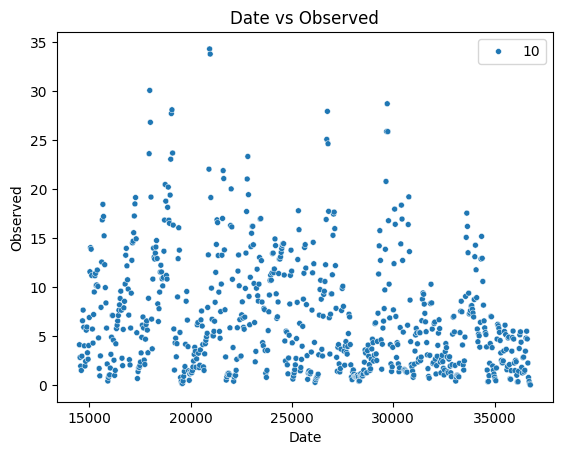

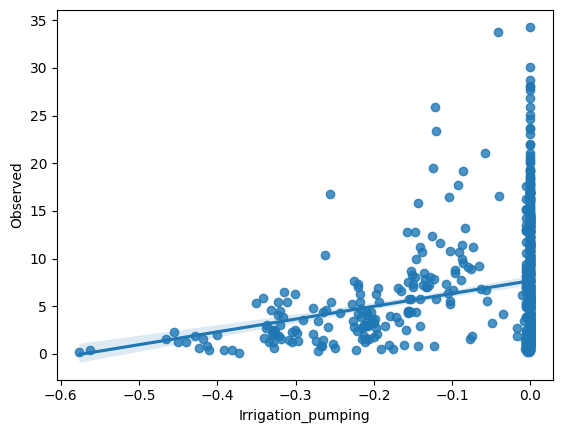

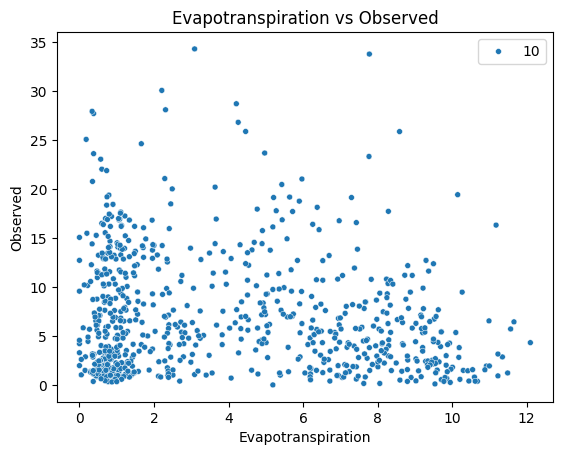

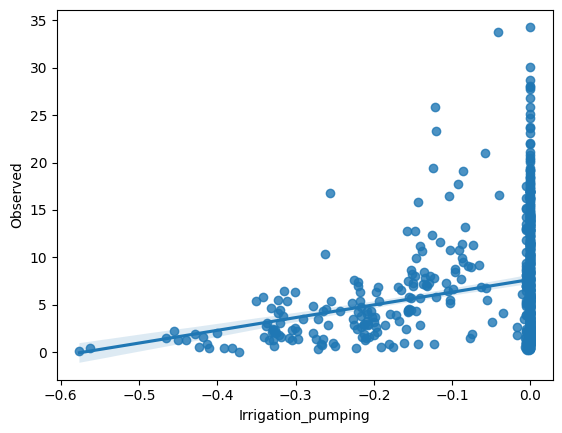

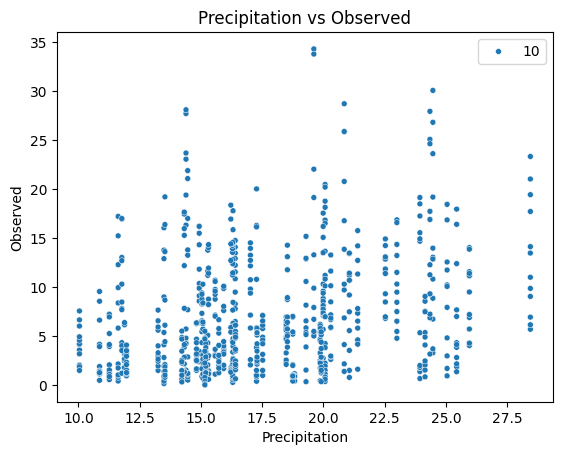

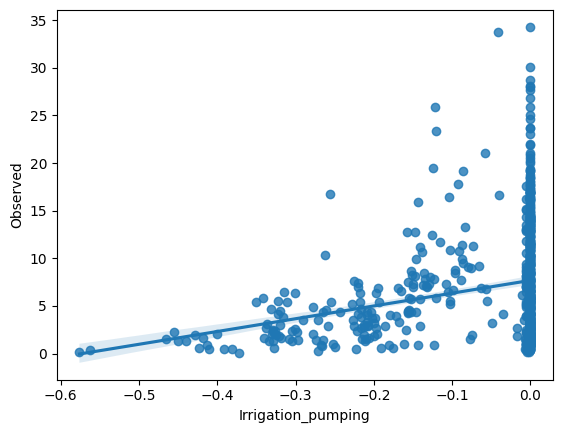

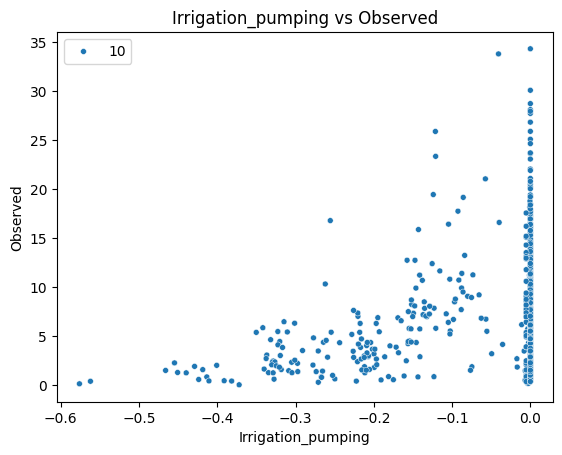

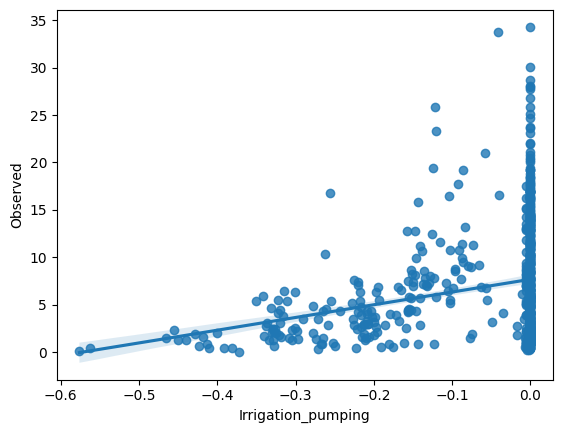

In [17]:
df_96 = df.loc[df['Segment_id'] == 96] # get the data for segment 96
for column in df.columns:
    if column not in ['Observed', 'x', 'y', 'Segment_id']:
        plt.figure()
        sns.scatterplot(data=df_96, x=column, y='Observed', size=10)
        plt.xlabel(column)
        plt.ylabel('Observed')
        plt.title(f'{column} vs Observed')

        # do the p tests and regression line
        plt.figure()
        sns.regplot(data=df_96, x='Irrigation_pumping', y='Observed')

        print(f'{column} vs Observed')
        lm = smf.ols(formula=f'Observed ~ {column}', data=df_96).fit()
        display(lm.params)
        display(lm.conf_int())
        print('p-values')
        display(lm.pvalues)